In [6]:
from matplotlib.lines import Line2D
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import lmfit
from lmfit import Model

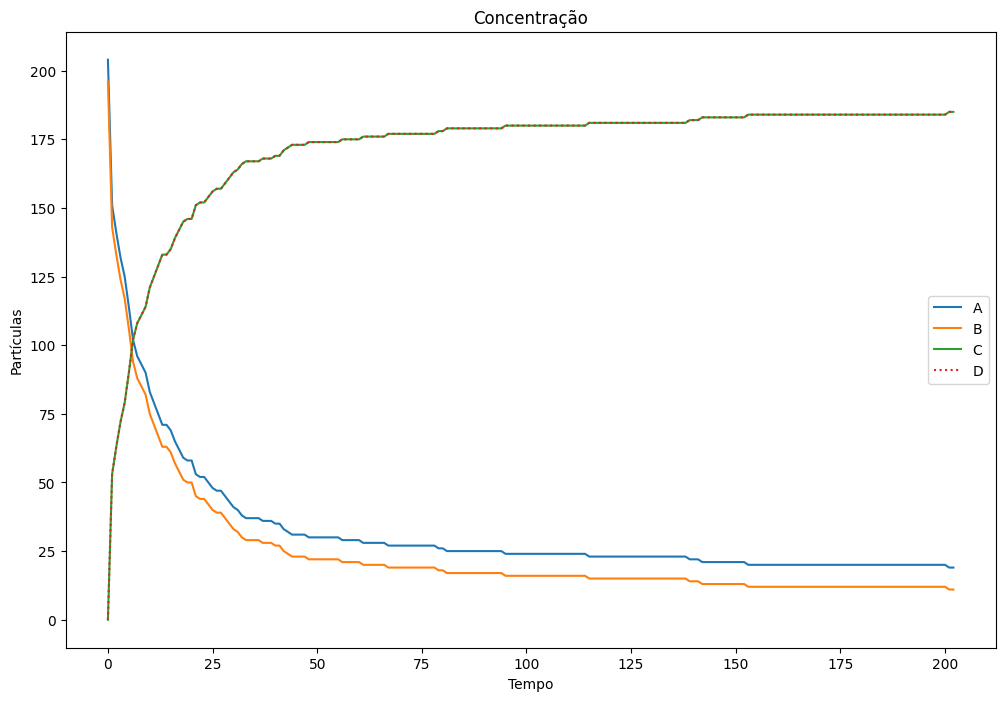

In [5]:
df = pd.read_csv("conc.csv")

c1y = df["C1"]
c2y = df["C2"]
c3y = df["C3"]
c4y = df["C4"]

fig, ax = plt.subplots(figsize = (12,8))

a1 = ax.plot(c1y, label="A")
a2 = ax.plot(c2y, label="B")
a3 = ax.plot(c3y, label="C")
a4 = ax.plot(c4y, label="D", linestyle = "dotted")
ax.set_xlabel("Tempo")
ax.set_ylabel("Partículas")
ax.set_title("Concentração")
ax.legend()

plt.show(block=False)

In [4]:
df = pd.read_csv("dados.csv")


x = df["Tempo"]

def expn(x, A, B, C):
    return A * np.exp(-B * x) + C

# Create lmfit Parameters and set initial guesses
params = lmfit.Parameters()
params.add('C1', value=1.0, min = 1)
params.add('C2', value=1.0, min = 1)
params.add('C3', value=1.0, min = 1)
params.add('C4', value=1.0, min = 1)

# Perform the fit
result = lmfit.minimize(expn(), params, args=(x, list(c1y,c2y,c3y,c4y)))

best_fit_params = result.params
A_optimized = best_fit_params['A'].value
B_optimized = best_fit_params['B'].value
C_optimized = best_fit_params['C'].value

# Access the standard errors of the fitted parameters
A_std_err = best_fit_params['A'].stderr
B_std_err = best_fit_params['B'].stderr
C_std_err = best_fit_params['C'].stderr

# Generate fitted data points for plotting
xfit = np.linspace(min(x), max(x), 100)
yfit = exponential(xfit, A_optimized, B_optimized, C_optimized)

# Plot the original data and the best-fit curve
plt.scatter(x, y, label='Data')
plt.plot(xfit, yfit, 'r-', label='Best Fit')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Print the optimized parameter values and their standard errors
print("A =", A_optimized, "±", A_std_err)
print("B =", B_optimized, "±", B_std_err)
print("C =", C_optimized, "±", C_std_err)

popt,pcov = curve_fit(exp, tempo, c1x)

popti,pcov = curve_fit(log, tempo ,c3x)

fig3, ax3 = plt.subplots(figsize = (12, 8))

ax3.set_title("Lei da Velocidade")

ax3.plot(tempo, exp(c1x, *popt), ls='--', color='black', label="Curva Ajustada A")

ax3.plot(tempo, log(c3x, *popti), ls='--', color='black', label="Curva Ajustada B")

ax3.grid('- -')

NameError: name 'lastcycle' is not defined

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

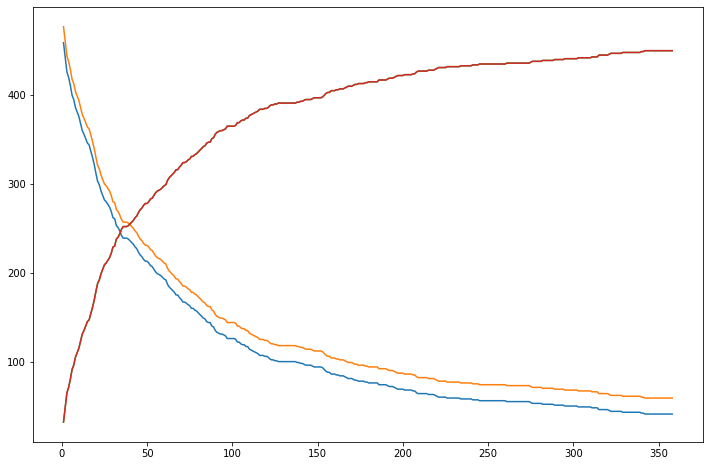

In [7]:
fig, ax4 = plt.subplots(figsize = (12,8))

ax4.plot(tempo, c1, tempo, c2, tempo, c3, tempo, c4)
ax4.plot(tempo, exp(tempo, *popt), tempo, log(tempo, *popt))
legenda = [Line2D([0], [0], label ='A'),
           Line2D([0], [0], label ='B'),
           Line2D([0], [0], label ='C'),
           Line2D([0], [0], linestyle = '--', label ='D')]
# ax4.plot(tempo, c2 label="B")
# ax4.plot(tempo, c3, label="C")
# ax4.plot(tempo, c4, label="D", linestyle = "dotted")
ax4.set_xlabel("Tempo")
ax4.set_ylabel("Partículas")
ax4.set_title("Concentração")
ax4.legend(handles=legenda)

plt.show()